In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("imsparsh/flowers-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/flowers-dataset


In [ ]:
data_dir= "/root/.cache/kagglehub/datasets/imsparsh/flowers-dataset/versions/2"
train_dir="/root/.cache/kagglehub/datasets/imsparsh/flowers-dataset/versions/2/train"
test_dir = "/root/.cache/kagglehub/datasets/imsparsh/flowers-dataset/versions/2/test"

In [ ]:
img_size1=(224,224)
img_size2=(180,180)
batch_size=32

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size2,
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    seed=42,
    label_mode="categorical"
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size2,
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=42,
    label_mode="categorical"
)
class_names=train_ds.class_names
print("Flower Classes:", class_names)

Found 2746 files belonging to 5 classes.
Using 2197 files for training.
Found 2746 files belonging to 5 classes.
Using 549 files for validation.
Flower Classes: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [ ]:
import os
from tensorflow.keras.utils import load_img, img_to_array

In [ ]:
def load_test_images(directory, img_size=img_size2):
    image_list = []
    file_names = []

    for fname in os.listdir(directory):
        if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(directory, fname)
            img = load_img(img_path, target_size=img_size)
            img_array = img_to_array(img) / 255.0
            image_list.append(img_array)
            file_names.append(fname)

    return np.array(image_list), file_names

X_test, test_filenames = load_test_images(test_dir)
print("Test images loaded:", len(X_test))


Test images loaded: 924


In [ ]:
model= Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(180,180,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

history=model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - accuracy: 0.2316 - loss: 62.6278 - val_accuracy: 0.2587 - val_loss: 1.6029
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.3118 - loss: 1.5547 - val_accuracy: 0.2987 - val_loss: 1.5452
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.3751 - loss: 1.4461 - val_accuracy: 0.3169 - val_loss: 1.5580
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.4579 - loss: 1.2853 - val_accuracy: 0.3242 - val_loss: 1.7804
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5169 - loss: 1.1867 - val_accuracy: 0.3461 - val_loss: 1.8363
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.6452 - loss: 0.9548 - val_accuracy: 0.4226 - val_loss: 1.8117
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.7169 - loss: 0.8072 - val_accuracy: 0.3643 - val_loss: 2.1757
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.7205 - loss: 0.7201 - val_accuracy: 0.3625 

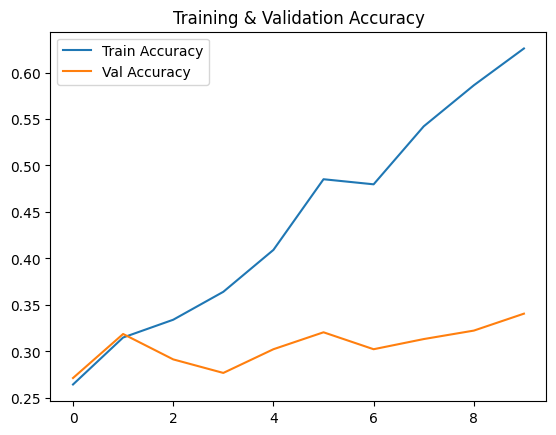

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Training & Validation Accuracy")
plt.show()

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

history=model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.3037 - loss: 2.0897 - val_accuracy: 0.5137 - val_loss: 1.1620
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.5151 - loss: 1.1583 - val_accuracy: 0.5993 - val_loss: 0.9967
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.6233 - loss: 0.9636 - val_accuracy: 0.5883 - val_loss: 0.9521
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.7265 - loss: 0.7231 - val_accuracy: 0.6412 - val_loss: 0.9365
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.8113 - loss: 0.5434 - val_accuracy: 0.6248 - val_loss: 1.0848
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.8564 - loss: 0.4193 - val_accuracy: 0.6430 - val_loss: 1.0877
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8919 - loss: 0.3183 - val_accuracy: 0.6211 - val_loss: 1.2758
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.9399 - loss: 0.1932 - val_accuracy: 0.6084 -

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=["accuracy"])

history=model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - accuracy: 0.3379 - loss: 2.3255 - val_accuracy: 0.4954 - val_loss: 1.1819
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.5623 - loss: 1.1408 - val_accuracy: 0.6175 - val_loss: 0.9774
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.6545 - loss: 0.9066 - val_accuracy: 0.6175 - val_loss: 1.0074
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.7676 - loss: 0.6556 - val_accuracy: 0.6157 - val_loss: 0.9908
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.8413 - loss: 0.4807 - val_accuracy: 0.6284 - val_loss: 1.1646
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.8738 - loss: 0.3721 - val_accuracy: 0.6594 - val_loss: 1.1361
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9157 - loss: 0.2717 - val_accuracy: 0.6339 - val_loss: 1.2957
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.9294 - loss: 0.2144 - val_accuracy: 0.6066 - val_loss: 

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model.fit(train_ds, validation_data=val_ds, epochs=30, callbacks=[early_stop])

Epoch 1/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.9867 - loss: 0.0919 - val_accuracy: 0.6339 - val_loss: 1.9662
Epoch 2/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.9674 - loss: 0.1231 - val_accuracy: 0.6193 - val_loss: 2.0223
Epoch 3/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.9683 - loss: 0.1067 - val_accuracy: 0.6430 - val_loss: 1.8512
Epoch 4/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.9789 - loss: 0.0806 - val_accuracy: 0.6029 - val_loss: 2.1675
Epoch 5/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.9786 - loss: 0.0801 - val_accuracy: 0.6029 - val_loss: 1.7683
Epoch 6/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.9793 - loss: 0.0806 - val_accuracy: 0.6193 - val_loss: 1.8165
Epoch 7/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9827 - loss: 0.0596 - val_accuracy: 0.6302 - val_loss: 1.9002
Epoch 8/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.9799 - loss: 0.0615 - val_accuracy: 0.6339 - v

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',
                      kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=["accuracy"])

history=model.fit(train_ds, epochs=30, validation_data=val_ds,  callbacks=[early_stop])


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.3407 - loss: 3.1881 - val_accuracy: 0.4900 - val_loss: 1.5196
Epoch 2/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.4553 - loss: 1.5671 - val_accuracy: 0.4681 - val_loss: 1.4445
Epoch 3/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.5068 - loss: 1.4897 - val_accuracy: 0.5938 - val_loss: 1.4234
Epoch 4/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.5402 - loss: 1.5064 - val_accuracy: 0.5647 - val_loss: 1.4455
Epoch 5/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.5438 - loss: 1.5344 - val_accuracy: 0.5865 - val_loss: 1.4539
Epoch 6/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.5823 - loss: 1.5450 - val_accuracy: 0.5883 - val_loss: 1.5645
Epoch 7/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.5873 - loss: 1.5687 - val_accuracy: 0.6157 - val_loss: 1.4700
Epoch 8/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.5974 - loss: 1.5588 - val_accuracy: 0.6302 - val_loss: 

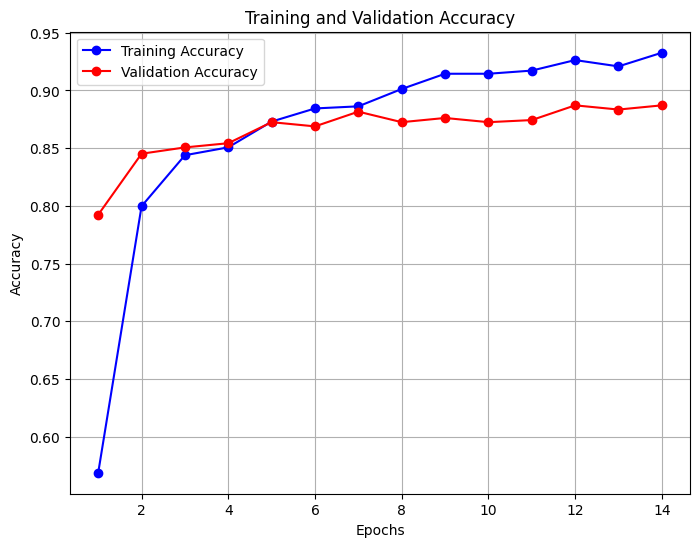

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=["accuracy"])

history=model.fit(train_ds, epochs=30, validation_data=val_ds,  callbacks=[early_stop])

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - accuracy: 0.3187 - loss: 101.0728 - val_accuracy: 0.4517 - val_loss: 1.4926
Epoch 2/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.5223 - loss: 1.2938 - val_accuracy: 0.5301 - val_loss: 1.2060
Epoch 3/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.6474 - loss: 0.9899 - val_accuracy: 0.4991 - val_loss: 1.2600
Epoch 4/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.6720 - loss: 0.8991 - val_accuracy: 0.5064 - val_loss: 1.3696
Epoch 5/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.7727 - loss: 0.6500 - val_accuracy: 0.4499 - val_loss: 2.1249
Epoch 6/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.8268 - loss: 0.5833 - val_accuracy: 0.4718 - val_loss: 1.7836
Epoch 7/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8319 - loss: 0.4972 - val_accuracy: 0.5209 - val_loss: 1.8445


In [ ]:
tf.keras.backend.clear_session()

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(180, 180, 3),
                                                include_top=False,
                                                weights='imagenet')

base_model.trainable = False
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation='softmax')
])
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=["accuracy"])

history=model.fit(train_ds, epochs=30, validation_data=val_ds,  callbacks=[early_stop])

/tmp/ipython-input-51-3631908761.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(180, 180, 3),


Epoch 1/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 23s 193ms/step - accuracy: 0.4440 - loss: 1.5288 - val_accuracy: 0.7923 - val_loss: 0.5630
Epoch 2/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.7867 - loss: 0.5648 - val_accuracy: 0.8452 - val_loss: 0.4490
Epoch 3/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.8419 - loss: 0.4717 - val_accuracy: 0.8506 - val_loss: 0.3982
Epoch 4/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8556 - loss: 0.3701 - val_accuracy: 0.8543 - val_loss: 0.3854
Epoch 5/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.8770 - loss: 0.3397 - val_accuracy: 0.8725 - val_loss: 0.3641
Epoch 6/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8920 - loss: 0.2951 - val_accuracy: 0.8689 - val_loss: 0.3561
Epoch 7/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.8965 - loss: 0.2737 - val_accuracy: 0.8816 - val_loss: 0.3489
Epoch 8/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.9048 - loss: 0.2695 - val_accuracy: 0.8725 -

In [ ]:
pred_probs= model.predict(X_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 197ms/step


In [ ]:
pred_classes = np.argmax(pred_probs, axis=1)

In [ ]:
class_names = train_ds.class_names

In [ ]:
predicted_labels = [class_names[i] for i in pred_classes]

In [ ]:
for fname, label in zip(test_filenames, predicted_labels):
    print(f"{fname} -> {label}")

Image_424.jpg -> dandelion
Image_825.jpg -> dandelion
Image_42.jpg -> dandelion
Image_105.jpg -> dandelion
Image_791.jpg -> dandelion
Image_447.jpg -> dandelion
Image_223.jpg -> dandelion
Image_595.jpg -> dandelion
Image_216.jpg -> dandelion
Image_668.jpg -> dandelion
Image_276.jpg -> dandelion
Image_732.jpg -> dandelion
Image_636.jpg -> dandelion
Image_246.jpg -> dandelion
Image_689.jpg -> dandelion
Image_903.jpg -> dandelion
Image_339.jpg -> dandelion
Image_681.jpg -> dandelion
Image_345.jpg -> dandelion
Image_356.jpg -> dandelion
Image_850.jpg -> dandelion
Image_671.jpg -> dandelion
Image_702.jpg -> dandelion
Image_842.jpg -> dandelion
Image_432.jpg -> dandelion
Image_3.jpg -> dandelion
Image_204.jpg -> dandelion
Image_268.jpg -> dandelion
Image_508.jpg -> dandelion
Image_48.jpg -> dandelion
Image_653.jpg -> dandelion
Image_154.jpg -> dandelion
Image_449.jpg -> dandelion
Image_94.jpg -> dandelion
Image_679.jpg -> dandelion
Image_107.jpg -> dandelion
Image_253.jpg -> dandelion
Image_

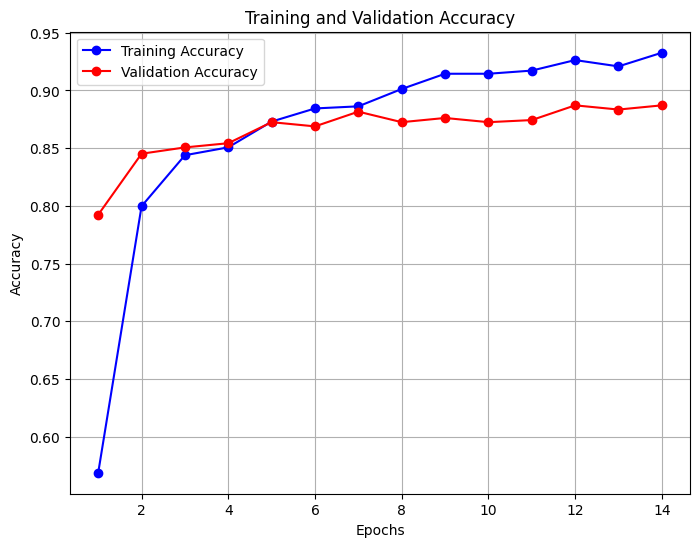

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model.save('/content/flower classification.h5')

In [ ]:
import pickle
with open('/content/flower_model_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

In [ ]:
!zip -r /content/flowers_dataset.zip /content/flowers/

	zip warning: name not matched: /content/flowers/

zip error: Nothing to do! (try: zip -r /content/flowers_dataset.zip . -i /content/flowers/)
